# Overall Status of Covid19 throughout the world

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
import requests

In [160]:
data = pd.read_csv('Downloads\owid-covid-data.csv', na_values = 'n/a', parse_dates = ['date'])

### Information of the .CSV File

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101335 entries, 0 to 101334
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   iso_code                               101335 non-null  object        
 1   continent                              96594 non-null   object        
 2   location                               101335 non-null  object        
 3   date                                   101335 non-null  datetime64[ns]
 4   total_cases                            97589 non-null   float64       
 5   new_cases                              97586 non-null   float64       
 6   new_cases_smoothed                     96576 non-null   float64       
 7   total_deaths                           87401 non-null   float64       
 8   new_deaths                             87557 non-null   float64       
 9   new_deaths_smoothed                    96576 non

### Description of the File

In [162]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,9.758900e+04,97586.000000,96576.000000,8.740100e+04,87557.000000,96576.000000,97070.000000,97067.000000,96062.000000,86895.000000,...,61288.000000,90866.000000,93222.000000,71056.000000,70019.000000,45658.000000,82756.000000,96227.000000,91005.000000,3571.000000
mean,1.094247e+06,6047.005052,6065.952194,2.943026e+04,146.170209,131.731618,13493.756782,76.226162,76.430968,297.007835,...,13.415879,258.563508,7.932725,10.566958,32.699353,50.823296,3.027102,73.237887,0.727261,18.251563
std,7.476858e+06,37722.466795,37443.852542,1.756569e+05,799.412231,743.287483,24647.811727,200.334332,158.591641,534.406573,...,19.963878,119.059777,4.154360,10.466462,13.487439,31.758441,2.458228,7.557479,0.150350,35.848993
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.316000e+03,2.000000,7.571000,5.500000e+01,0.000000,0.000000,265.769000,0.218500,1.304000,8.105000,...,0.600000,167.295000,5.310000,1.900000,21.600000,19.351000,1.300000,67.920000,0.602000,0.450000
50%,1.389700e+04,74.000000,92.714000,4.100000e+02,2.000000,1.429000,1862.627000,8.557000,11.286000,52.808000,...,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.748000,7.390000
75%,1.486650e+05,817.000000,858.892750,3.934000e+03,18.000000,14.571000,14201.088750,70.332500,78.664000,325.009500,...,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.740000,0.848000,23.995000
max,1.860587e+08,906017.000000,826388.429000,4.018988e+06,18060.000000,14735.857000,182165.275000,18293.675000,4083.500000,5881.048000,...,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,409.760000


### Considering the data updated on 1st July 2021 & Removing the entries of continents from location column

In [163]:
uniquedata = data[(data.date == '2021-01-07')]
df = pd.DataFrame(uniquedata)
df.dropna(subset = ["continent"], inplace=True)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
1688,AFG,Asia,Afghanistan,2021-01-07,120216.0,1557.0,1526.286,4962.0,91.0,72.857,...,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,NaN
1690,ALB,Europe,Albania,2021-01-07,132523.0,2.0,3.429,2456.0,0.0,0.143,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1691,DZA,Africa,Algeria,2021-01-07,140075.0,449.0,381.714,3726.0,10.0,8.143,...,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,NaN
1692,AND,Europe,Andorra,2021-01-07,13918.0,7.0,5.857,127.0,0.0,0.000,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,NaN
1693,AGO,Africa,Angola,2021-01-07,38965.0,116.0,124.857,903.0,3.0,3.143,...,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,NaN


### Viewing NaN values

In [164]:
df.isna().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                               19
new_cases                                 19
new_cases_smoothed                        19
total_deaths                              26
new_deaths                                26
new_deaths_smoothed                       19
total_cases_per_million                   19
new_cases_per_million                     19
new_cases_smoothed_per_million            19
total_deaths_per_million                  26
new_deaths_per_million                    26
new_deaths_smoothed_per_million           19
reproduction_rate                         27
icu_patients                             190
icu_patients_per_million                 190
hosp_patients                            186
hosp_patients_per_million                186
weekly_icu_admissions                    211
weekly_icu

### Deleating unwanted columns

In [165]:
df = df.drop(['weekly_hosp_admissions', 'weekly_hosp_admissions_per_million','icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','excess_mortality'], axis = 1)

### Top 15 countries which have faced the larger impact of this pandemic

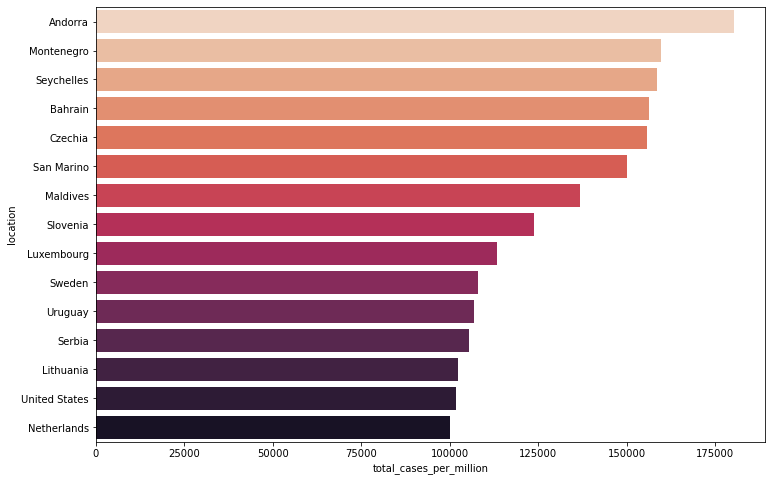

In [257]:
top_affected_countries = df.sort_values(by = ['total_cases_per_million'], ascending = False).head(15)
plt.figure(figsize = (12,8))
sns.barplot(data=top_affected_countries,x = 'total_cases_per_million', y="location", palette="rocket_r")
plt.show()

In [278]:
df["hospital_beds_per_million"] = df["hospital_beds_per_thousand"] * 1000
df["new_cases_per_million_max"] = data[data.location == 'Andorra']['new_cases_per_million'].max()
df[df.location == 'Andorra'][['location','population','diabetes_prevalence','female_smokers','male_smokers','new_cases_per_million_max','hospital_beds_per_million']]

,location,population,diabetes_prevalence,female_smokers,male_smokers,new_cases_per_million_max,hospital_beds_per_million
1692,Andorra,77265.0,7.97,29.0,37.8,3869.799,3800.0


In [281]:
data[data.new_cases_per_million == 3869.799]['date']

57074   2020-12-10
Name: date, dtype: datetime64[ns]

### Top 15 countries which have most new cases

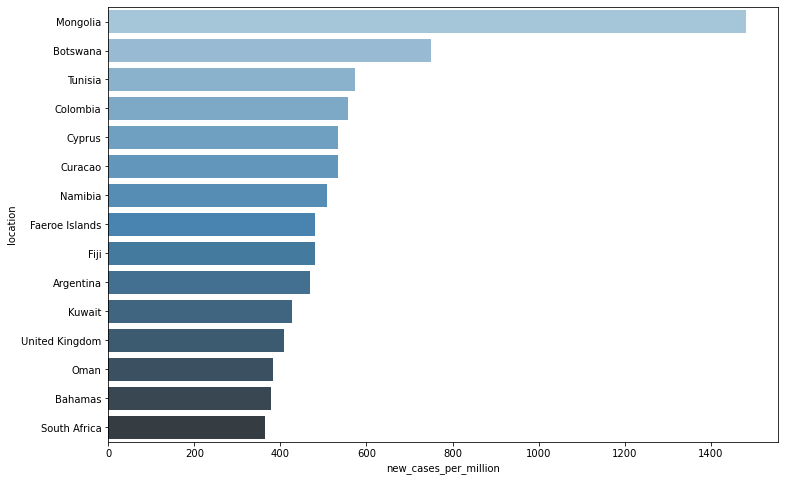

In [282]:
fast_spreading_countries = df.sort_values(by = ['new_cases_per_million'], ascending = False).head(15)
plt.figure(figsize = (12,8))
sns.barplot(data=fast_spreading_countries,x = 'new_cases_per_million', y="location", palette="Blues_d")
plt.show()

In [289]:
df["hospital_beds_per_million"] = df["hospital_beds_per_thousand"] * 1000
df["vaccination_percentage"] = ((df["people_fully_vaccinated"] / df["population"]) * 100).round(2)
df["new_cases_per_million_max"] = data[data.location == 'Mongolia']['new_cases_per_million'].max()
df[df.location == 'Mongolia'][['location','population','people_fully_vaccinated','vaccination_percentage','diabetes_prevalence','female_smokers','male_smokers','new_cases_per_million','hospital_beds_per_million']]

,location,population,people_fully_vaccinated,vaccination_percentage,diabetes_prevalence,female_smokers,male_smokers,new_cases_per_million,hospital_beds_per_million
1821,Mongolia,3278292.0,1750266.0,53.39,4.82,5.5,46.5,1482.784,7000.0


### Top 15 countries which have the highest death rate.

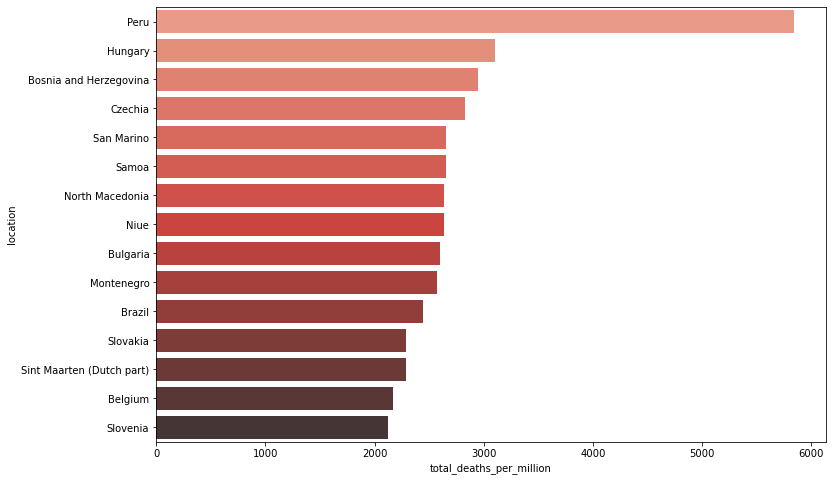

In [290]:
highest_death_countries = df.sort_values(by = ['total_deaths_per_million'], ascending = False).head(15)
plt.figure(figsize = (12,8))
sns.barplot(data=highest_death_countries,x = 'total_deaths_per_million', y="location",
            palette="Reds_d")
plt.show()

In [303]:
df["hospital_beds_per_million"] = df["hospital_beds_per_thousand"] * 1000
df["vaccination_percentage"] = ((df["people_fully_vaccinated"] / df["population"]) * 100).round(2)
df["new_deaths_per_million_max"] = data[data.location == 'Peru']['new_deaths_per_million'].max()
df[df.location == 'Peru'][['location','population','people_fully_vaccinated','vaccination_percentage','diabetes_prevalence','female_smokers','male_smokers','new_deaths_per_million_max','hospital_beds_per_million']]

,location,population,people_fully_vaccinated,vaccination_percentage,diabetes_prevalence,female_smokers,male_smokers,new_deaths_per_million_max,hospital_beds_per_million
1846,Peru,32971846.0,3226859.0,9.79,5.95,4.8,40.8,37.426,1600.0


In [307]:
data[data.new_deaths_per_million == 37.426]['date']

17236   2021-04-23
Name: date, dtype: datetime64[ns]

In [450]:
page = requests.get("https://www.cnbc.com/2021/07/09/covid-heres-what-you-need-to-know-the-lambda-variant.html")
soup = BeautifulSoup(page.text, 'html.parser')
results = soup.find_all('p')
Expected = results[9]
Expected.text[1:112]

'Authorities in Peru reported that 81% of Covid-19 cases sequenced since April 2021 were associated with Lambda.'

### Top 15 countries with highest test positivity rate

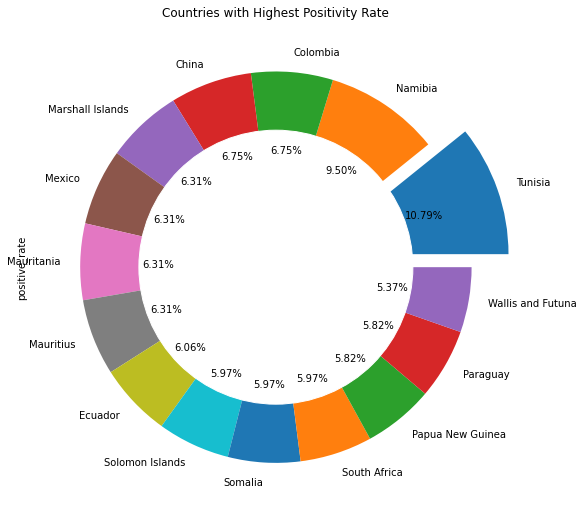

In [252]:
highest_positivity_rate = df.sort_values(by = ['positive_rate'], ascending = False).head(15)
plt.figure(figsize = (9, 9))
highest_positivity_rate['positive_rate'].plot.pie(labels = highest_positivity_rate.location, autopct = '%1.2f%%',explode = (0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
plt.title("Countries with Highest Positivity Rate")
plt.show()

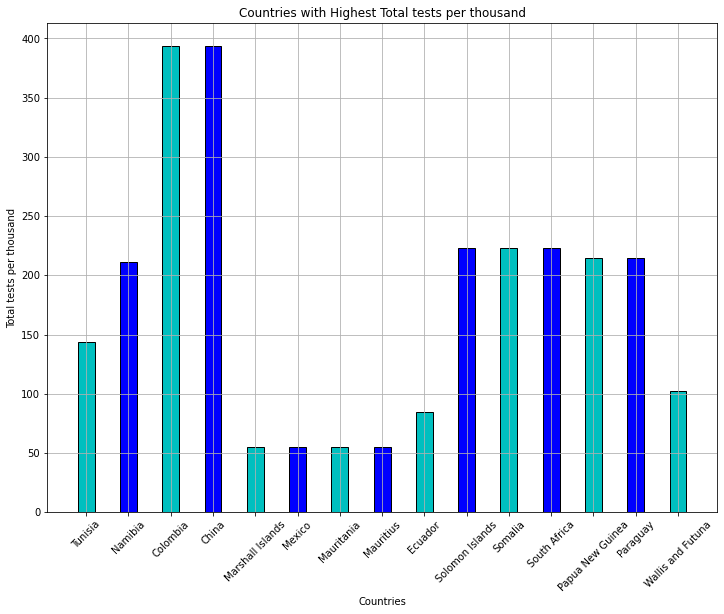

In [256]:
plt.figure(figsize = (12, 9))
plt.bar(highest_positivity_rate['location'],highest_positivity_rate['total_tests_per_thousand'], width = 0.4, color ='cb', edgecolor = 'black')
plt.grid()
plt.xticks(rotation=45)
plt.xlabel("Countries")
plt.ylabel("Total tests per thousand")
plt.title("Countries with Highest Total tests per thousand")
plt.show()

### Top 15 Countries with most of their population above 65

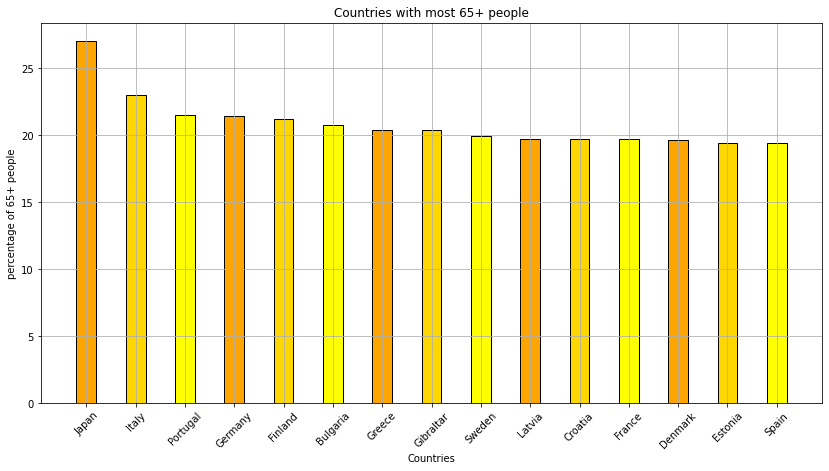

In [376]:
most_65_country = df.sort_values(by = ['aged_65_older'], ascending = False).head(15)
plt.figure(figsize = (14, 7))
plt.bar(most_65_country['location'],most_65_country['aged_65_older'], width = 0.4, color =['orange','gold','yellow'], edgecolor = 'black')
plt.grid()
plt.xticks(rotation=45)
plt.xlabel("Countries")
plt.ylabel("percentage of 65+ people")
plt.title("Countries with most 65+ people")
plt.show()

### Top 15 countries with population more than 70

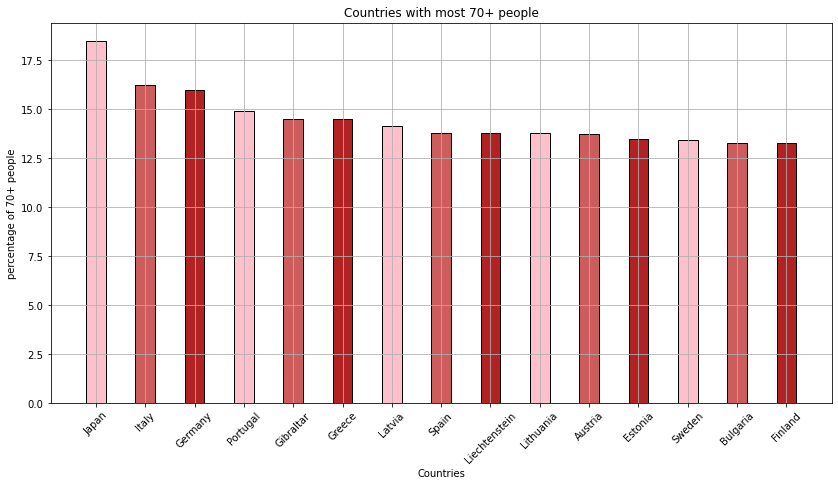

In [377]:
most_70_country = df.sort_values(by = ['aged_70_older'], ascending = False).head(15)
plt.figure(figsize = (14, 7))
plt.bar(most_70_country['location'],most_70_country['aged_70_older'], width = 0.4, color =['pink','indianRed','firebrick'], edgecolor = 'black')
plt.grid()
plt.xticks(rotation=45)
plt.xlabel("Countries")
plt.ylabel("percentage of 70+ people")
plt.title("Countries with most 70+ people")
plt.show()

### As the population percentage is almost equal, I'm considering the population of 65+

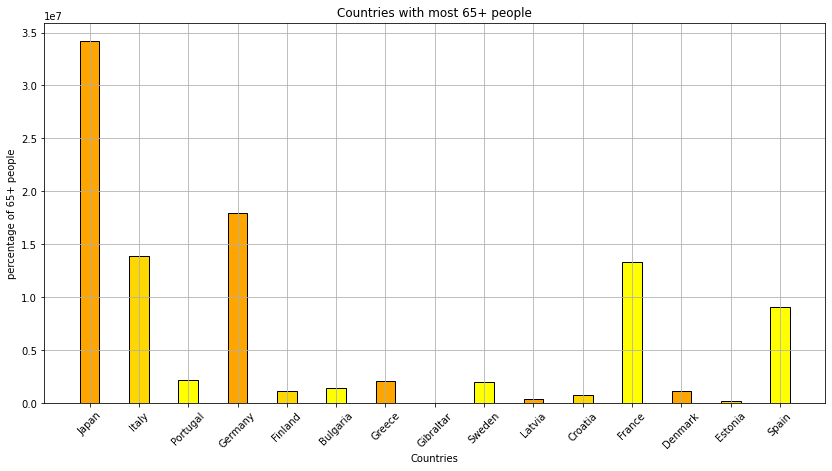

In [380]:
most_65_country = df.sort_values(by = ['aged_65_older'], ascending = False).head(15)
most_65_country['65_above_population'] = (most_65_country['aged_65_older'] * most_65_country['population'])/100
plt.figure(figsize = (14, 7))
plt.bar(most_65_country['location'],most_65_country['65_above_population'], width = 0.4, color =['orange','gold','yellow'], edgecolor = 'black')
plt.grid()
plt.xticks(rotation=45)
plt.xlabel("Countries")
plt.ylabel("population of 65+ people")
plt.title("Countries with most 65+ people")
plt.show()

### Top 15 countries with high diabetes prevalence

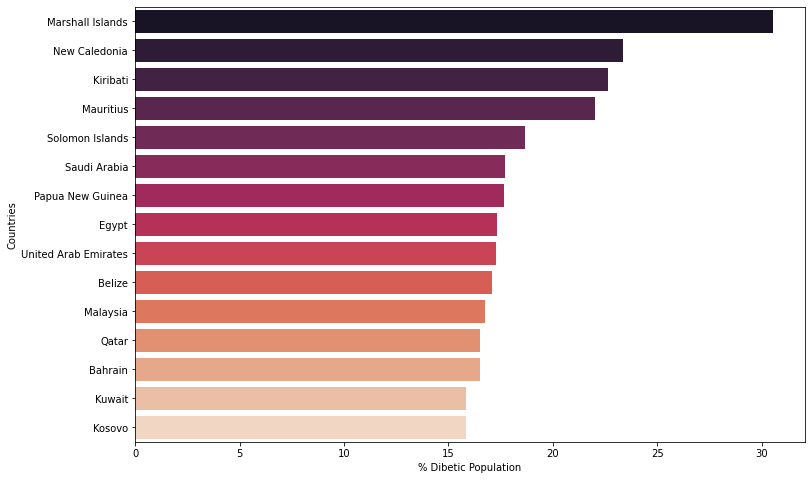

In [392]:
top_diabetic_countries = df.sort_values(by = ['diabetes_prevalence'], ascending = False).head(15)
plt.figure(figsize = (12,8))
ax = sns.barplot(data=top_diabetic_countries,x = 'diabetes_prevalence', y="location",
            palette="rocket")
ax.set(xlabel="% Dibetic Population", ylabel = "Countries")
plt.show()

### Top 15 Countries with % highest smoking Males

In [404]:
top_male_smokers = df.sort_values(by = ['male_smokers'], ascending = False).head(15)
top_male_smokers[['location','male_smokers','female_smokers']]

,location,male_smokers,female_smokers
1886,Timor,78.1,6.3
1780,Indonesia,76.1,2.8
1889,Tunisia,65.8,1.1
1888,Trinidad and Tobago,65.8,1.1
1794,Kiribati,58.9,35.9
1852,Russia,58.3,23.4
1762,Georgia,55.5,5.3
1811,Maldives,55.0,2.1
1801,Lesotho,53.9,0.4
1737,Cuba,53.3,17.1


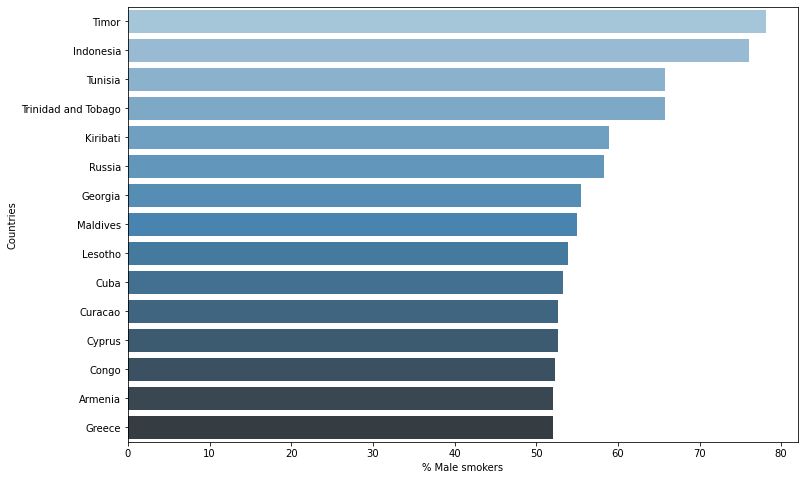

In [398]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data=top_male_smokers,x = 'male_smokers', y="location",
            palette="Blues_d")
ax.set(xlabel="% Male smokers", ylabel = "Countries")
plt.show()

In [405]:
top_female_smokers = df.sort_values(by = ['female_smokers'], ascending = False).head(15)
top_female_smokers[['location','female_smokers','male_smokers']]

,location,female_smokers,male_smokers
1822,Montenegro,44.0,47.9
1862,Serbia,37.7,40.2
1794,Kiribati,35.9,58.9
1765,Gibraltar,35.3,52.0
1766,Greece,35.3,52.0
1735,Cote d'Ivoire,34.3,39.9
1736,Croatia,34.3,39.9
1729,Chile,34.2,41.5
1727,Central African Republic,34.2,41.5
1728,Chad,34.2,41.5


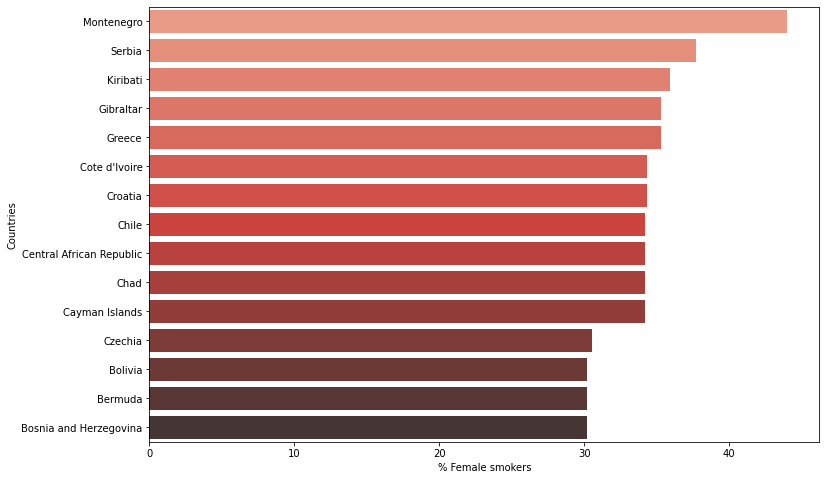

In [400]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data=top_female_smokers,x = 'female_smokers', y="location",
            palette="Reds_d")
ax.set(xlabel="% Female smokers", ylabel = "Countries")
plt.show()

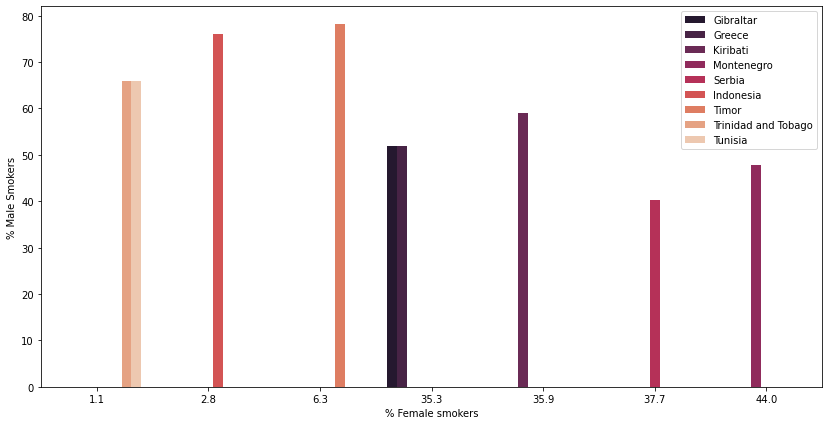

In [438]:
top_smoker_countries1 = df[df['female_smokers']>=35.0]
top_smoker_countries2 = df[df['male_smokers']>=60.0]
top_smoker_countries = pd.merge(top_smoker_countries1, top_smoker_countries2, how='outer')
plt.figure(figsize = (14,7))
ax = sns.barplot(data=top_smoker_countries,x = 'female_smokers', y="male_smokers", hue = 'location',
            palette="rocket")
ax.set(xlabel="% Female smokers", ylabel = "% Male Smokers")
plt.legend(loc='upper right')
plt.show()

### Countries with Low Human Devlopment Index

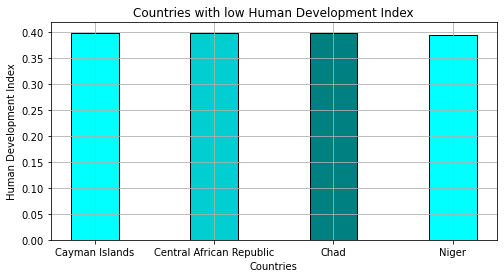

In [449]:
low_development_index = df[df['human_development_index']<=0.4]
plt.figure(figsize = (8,4))
plt.bar(low_development_index['location'],low_development_index['human_development_index'], width = 0.4, color =['cyan','darkturquoise','teal'], edgecolor = 'black')
plt.grid()
plt.xlabel("Countries")
plt.ylabel("Human Development Index")
plt.title("Countries with low Human Development Index")
plt.show()

# Conclusion

## From the above analysis I can conclude that the countries which are more prone to corona virus and should be vaccinated on priority are

#### (1) Japan, Italy, Germany, France, Spain (More Old Age population)

#### (2) Marshall Islands, New Caledonia, Kiribati, Mauritius (High Diabetic Prevalence)

#### (3) Gibraltar, Greece, Kiribati, Montenegro, Serbia, Indonesia, Timor, Trinidad and Tobago & Tunisia (most of the population are smokers)

#### (4) Cayman Islands, Central African Republic, Chad, Niger (Low Human Development Index)